# Convolutions
In this notebook I will go over basic convolutions. My first example is an example of a 1D convolution. First I will do a convolution using the `numpy` library then I will show a convolution 1D convolution done  manually. 1D convolutions are for 1 dimensional data such as a single array or a function. 2D convolutions are more generally done on something like a image. 

In [139]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
np.convolve([1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 0], [0.1, 0.2], 'same')

array([0.1, 0.3, 0.3, 0.4, 0.6, 0.7, 0.9, 0.7, 0.3, 0.3, 0.3, 0.2])

In [141]:
def preform1DConvolution(kernel, arr):
    result = []
    for i in range(len(arr)-len(kernel)):
        res = kernel[1] * arr[i] + kernel[0] * arr[i+1]
        result.append(round(res,1))
    return result

In [142]:
arrayOne = [0.1, 0.2,]
arrayTwo = [0, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 0, 0]

In [143]:
print(preform1DConvolution(arrayOne, arrayTwo))

[0.1, 0.3, 0.3, 0.4, 0.6, 0.7, 0.9, 0.7, 0.3, 0.3, 0.3, 0.2]


In [144]:
def preform2DConvolution(kernel, arr):
    result = []
#     for i in arr:
#         for j in i:
#             print()

    for i in range(len(arr)-len(kernel)+1):
        print(i)
        pixel = 

#    from row 0 to row 3, the 0 column
#     print(arr[0:3:,0])
    
#    from row 0 to row 3, the 1 column
#     print(arr[0:3:,1])

#    from row 0 to row 3, the 2 column
#     print(arr[0:3:,2])

    
#     print(np.multiply(arr[0:3:,0], kernel[0:3:,0]))
#     print(np.multiply(arr[0:3:,1], kernel[0:3:,1]))
#     print(np.multiply(arr[0:3:,2], kernel[0:3:,2]))

    
    return result

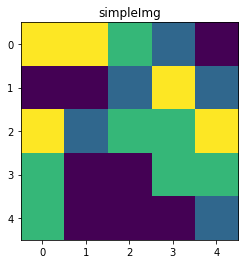

In [145]:
simpleImg = np.array([[3, 3, 2, 1, 0],[0, 0, 1, 3, 1], [3, 1, 2, 2, 3], [2, 0, 0, 2, 2], [2, 0, 0, 0, 1]])
plt.imshow(simpleImg)
plt.title('simpleImg')
plt.show()

In [146]:
simpleFilter = np.array([[0, 1, 2],[2, 2 , 0], [0, 1, 2]])
preform2DConvolution(simpleFilter, simpleImg)

0
1
2


[]

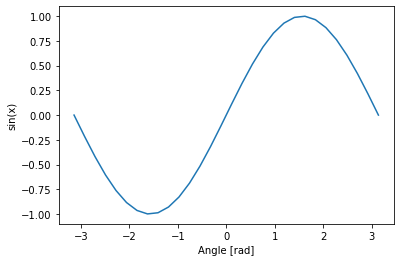

In [147]:
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 30)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

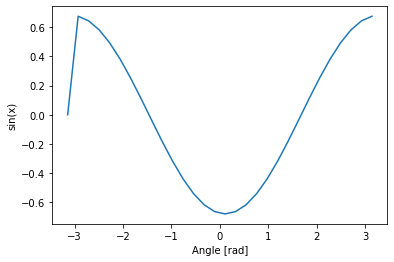

In [148]:
import matplotlib.pylab as plt
g = [-np.pi, np.pi]
x = np.linspace(-np.pi, np.pi, 30)
plt.plot(x, np.convolve(np.sin(x), g, 'same'))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()